## Importing All Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Flatten, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras_tuner import RandomSearch
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. GOOGLE (GOOGL) Stock Price Dataset

In [ ]:
df = yf.download('GOOGL', start='2004-08-19', end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044


In [ ]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2024-11-04 00:00:00+00:00,169.240005,169.240005,170.729996,168.009995,169.929993,21492700
2024-11-05 00:00:00+00:00,169.740005,169.740005,170.529999,168.839996,169.429993,18242100
2024-11-06 00:00:00+00:00,176.509995,176.509995,176.940002,173.500000,173.800003,33695500
2024-11-07 00:00:00+00:00,180.750000,180.750000,181.080002,177.190002,177.410004,25352900
2024-11-08 00:00:00+00:00,178.350006,178.350006,180.899994,178.080002,180.649994,21981700


### Dropping the multilevel columns names

In [ ]:
df.columns = df.columns.get_level_values(0)

In [ ]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2004-08-19 00:00:00+00:00,2.504808,2.511011,2.604104,2.401401,2.502503,893181924
2004-08-20 00:00:00+00:00,2.703765,2.710460,2.729730,2.515015,2.527778,456686856
2004-08-23 00:00:00+00:00,2.730976,2.737738,2.839840,2.728979,2.771522,365122512
2004-08-24 00:00:00+00:00,2.617892,2.624374,2.792793,2.591842,2.783784,304946748
2004-08-25 00:00:00+00:00,2.646101,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...,...
2024-11-04 00:00:00+00:00,169.240005,169.240005,170.729996,168.009995,169.929993,21492700
2024-11-05 00:00:00+00:00,169.740005,169.740005,170.529999,168.839996,169.429993,18242100
2024-11-06 00:00:00+00:00,176.509995,176.509995,176.940002,173.500000,173.800003,33695500


In [ ]:
df.duplicated().sum()

0

## Copying the dataset for future use

In [ ]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

### Dropping unwanted column

In [ ]:
df.drop(['Adj Close'], axis=1, inplace=True)

In [ ]:
df

Price,Close,High,Low,Open,Volume
0,2.511011,2.604104,2.401401,2.502503,893181924
1,2.710460,2.729730,2.515015,2.527778,456686856
2,2.737738,2.839840,2.728979,2.771522,365122512
3,2.624374,2.792793,2.591842,2.783784,304946748
4,2.652653,2.702703,2.599600,2.626627,183772044
...,...,...,...,...,...
5087,169.240005,170.729996,168.009995,169.929993,21492700
5088,169.740005,170.529999,168.839996,169.429993,18242100
5089,176.509995,176.940002,173.500000,173.800003,33695500
5090,180.750000,181.080002,177.190002,177.410004,25352900


### Splitting into features and target

In [ ]:
features = df[['Open', 'High', 'Low', 'Volume']]
target = df[['Close']]

### Scaling the features

In [ ]:
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

# Scale the features (Open, High, Low, Volume)
scaled_features = scaler_features.fit_transform(features)

# Scale the target (Close)
scaled_target = scaler_target.fit_transform(target)

### Convert to DataFrame to maintain indices

In [ ]:
# Combine the scaled features and scaled target into a new DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Volume'])
scaled_data['Close'] = scaled_target  # Use the scaled Close values as the target

### Function to create sequences

In [ ]:
sequence_length = 60
X = []
y = []
target_index = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[['Open', 'High', 'Low', 'Volume']].values[i-sequence_length:i])
    y.append(scaled_data['Close'].values[i])
    target_index.append(i)  # store index of each target value

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

### Splitting the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, y_test_indices = train_test_split(target_index, test_size=0.2, random_state=42)

### Model Building using CNN

In [ ]:
def build_model(hp):
    model = Sequential()

    # Tune the number of units in each LSTM layer
    units_1 = hp.Int('units_1', min_value=64, max_value=128, step=32)
    units_2 = hp.Int('units_2', min_value=32, max_value=64, step=16)
    units_3 = hp.Int('units_3', min_value=25, max_value=50, step=25)

    # Tune dropout rate
    dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.3])

    # Tune the dense layer units
    dense_units = hp.Choice('dense_units', values=[25, 50])

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Add LSTM layers with tuned units and dropout
    model.add(LSTM(units=units_1, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units_2, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=units_3))

    # Add Dense layers
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dense(1))  # Single output for regression

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Minimize validation loss
    max_trials=10,         # Number of hyperparameter combinations to try
    executions_per_trial=1, # Number of times to train each model
    directory='kt_tuner_dirs', # Directory to save logs
    project_name='lstm_stock_price'
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter search
tuner.search(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=50,
             callbacks=[early_stopping],
             batch_size=32)

Trial 10 Complete [00h 03m 04s]
val_loss: 0.0001565208367537707

Best val_loss So Far: 9.275647607864812e-05
Total elapsed time: 01h 27m 04s


In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# Make predictions on the test set
predictions = best_model.predict(X_test)
predictions.flatten()

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


array([0.10505162, 0.06546044, 0.21211354, ..., 0.0407541 , 0.06482197,
       0.05330701], dtype=float32)

In [ ]:
y_test

array([0.10164807, 0.07034379, 0.21371283, ..., 0.03726221, 0.06617245,
       0.05278569])

In [ ]:
y_pred_inv = scaler_target.inverse_transform(predictions)
y_test_inv = scaler_target.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
prediction = pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted': y_pred_inv.flatten()}, index=y_test_indices)
for a in prediction.index:
    for b in df1.index:
        if a == b:
            prediction['Date'] = df1['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2004-11-24 00:00:00+00:00,4.373373,5.205482
2004-12-01 00:00:00+00:00,4.503504,5.306292
2004-12-08 00:00:00+00:00,4.253754,5.547965
2004-12-10 00:00:00+00:00,4.295546,5.542283
2004-12-16 00:00:00+00:00,4.416166,5.653167
...,...,...
2024-09-26 00:00:00+00:00,162.729996,162.879608
2024-10-07 00:00:00+00:00,162.979996,165.867310
2024-10-18 00:00:00+00:00,163.419998,165.138351


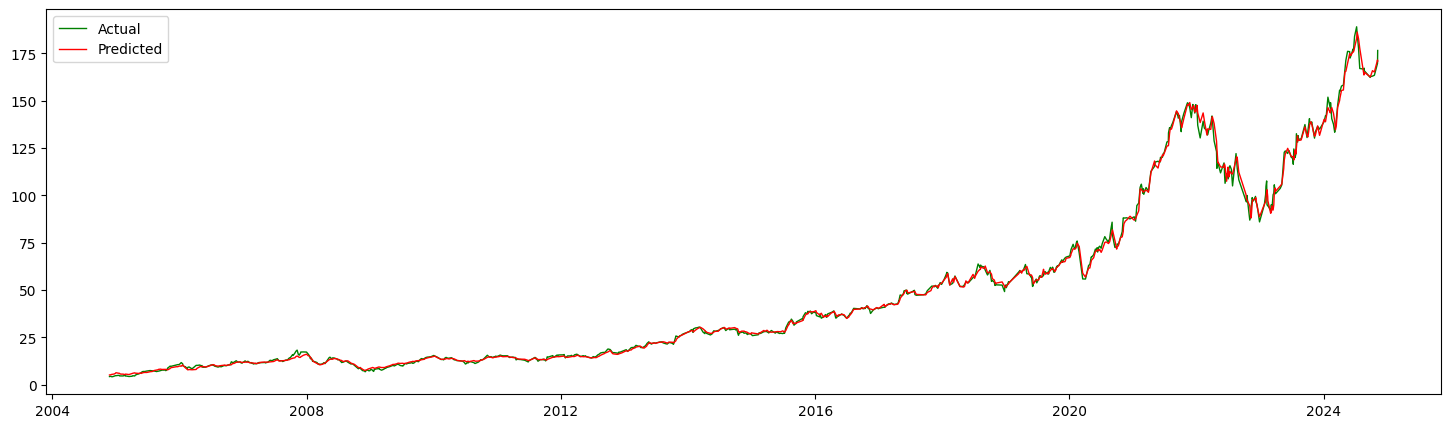

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


## Calculating the Performance Evaluation Metrics

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 9.275647434930516e-05
Root Mean Squared Error: 0.009631016267731312
Mean Absolute Error: 0.005989932107418473


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 3.3020466592781434
Root Mean Squared Error: 1.817153449568347
Mean Absolute Error: 1.1301637685523842
